In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("multi_thread_log.csv")
df.head()

,type,nmax,nsteps,temp,order,threads,time
0,cython_omp,400,50,0.5,0.272393,1,2.206593
1,cython_omp,400,50,0.5,0.272507,1,2.248343
2,cython_omp,400,50,0.5,0.266134,1,2.244509
3,cython_omp,400,50,0.5,0.268502,1,2.230965
4,cython_omp,400,50,0.5,0.251961,1,2.220424


In [4]:
cython_omp_df = df[df["type"] == "cython_omp"]
mpi_df = df[df["type"] == "mpi"]
numba_mpi_df = df[df["type"] == "numba_mpi"]
cython_mpi_df = df[df["type"] == "cython_mpi"]

In [5]:
cython_omp_grouped_df = cython_omp_df.groupby("threads")
mpi_grouped_df = mpi_df.groupby("threads")
numba_mpi_grouped_df = numba_mpi_df.groupby("threads")
cython_mpi_grouped_df = cython_mpi_df.groupby("threads")

In [15]:
cython_mpi_grouped_df["time"].mean()

threads
1     33.241496
2     23.509017
4     18.180443
8     14.560253
12    11.582468
16    11.873977
Name: time, dtype: float64

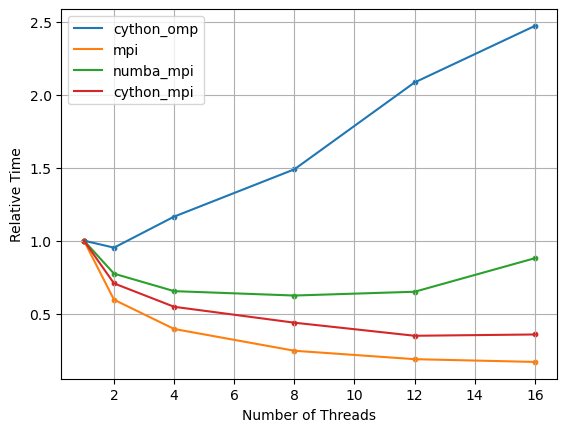

In [22]:
plt.scatter(cython_omp_grouped_df["threads"].mean(), cython_omp_grouped_df["time"].mean() / cython_omp_grouped_df["time"].mean()[1], s=10)
plt.scatter(mpi_grouped_df["threads"].mean(), mpi_grouped_df["time"].mean() / mpi_grouped_df["time"].mean()[1], s=10)
plt.scatter(numba_mpi_grouped_df["threads"].mean(), numba_mpi_grouped_df["time"].mean() / numba_mpi_grouped_df["time"].mean()[1], s=10)
plt.scatter(cython_mpi_grouped_df["threads"].mean(), cython_mpi_grouped_df["time"].mean() / cython_mpi_grouped_df["time"].mean()[1], s=10)

plt.plot(cython_omp_grouped_df["threads"].mean(), cython_omp_grouped_df["time"].mean() / cython_omp_grouped_df["time"].mean()[1], label="cython_omp")
plt.plot(mpi_grouped_df["threads"].mean(), mpi_grouped_df["time"].mean() / mpi_grouped_df["time"].mean()[1], label="mpi")
plt.plot(numba_mpi_grouped_df["threads"].mean(), numba_mpi_grouped_df["time"].mean() / numba_mpi_grouped_df["time"].mean()[1], label="numba_mpi")
plt.plot(cython_mpi_grouped_df["threads"].mean(), cython_mpi_grouped_df["time"].mean() / cython_mpi_grouped_df["time"].mean()[1], label="cython_mpi")

plt.xlabel("Number of Threads")
plt.ylabel("Relative Time")
plt.legend()
plt.grid()

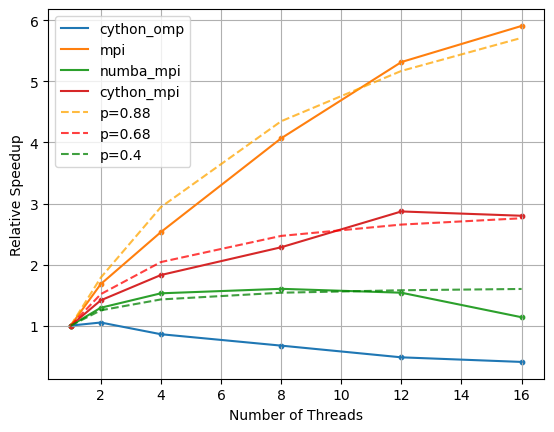

In [34]:
plt.scatter(cython_omp_grouped_df["threads"].mean(), cython_omp_grouped_df["time"].mean()[1] / cython_omp_grouped_df["time"].mean(), s=10)
plt.scatter(mpi_grouped_df["threads"].mean(), mpi_grouped_df["time"].mean()[1] / mpi_grouped_df["time"].mean(), s=10)
plt.scatter(numba_mpi_grouped_df["threads"].mean(), numba_mpi_grouped_df["time"].mean()[1] / numba_mpi_grouped_df["time"].mean(), s=10)
plt.scatter(cython_mpi_grouped_df["threads"].mean(), cython_mpi_grouped_df["time"].mean()[1] / cython_mpi_grouped_df["time"].mean(), s=10)

plt.plot(cython_omp_grouped_df["threads"].mean(), cython_omp_grouped_df["time"].mean()[1] / cython_omp_grouped_df["time"].mean(), label="Cython OpenMP")
plt.plot(mpi_grouped_df["threads"].mean(), mpi_grouped_df["time"].mean()[1] / mpi_grouped_df["time"].mean(), label="Base MPI")
plt.plot(numba_mpi_grouped_df["threads"].mean(), numba_mpi_grouped_df["time"].mean()[1] / numba_mpi_grouped_df["time"].mean(), label="Numba MPI")
plt.plot(cython_mpi_grouped_df["threads"].mean(), cython_mpi_grouped_df["time"].mean()[1] / cython_mpi_grouped_df["time"].mean(), label="Cython MPI")

plt.plot(mpi_grouped_df["threads"].mean(), 1 / (1 - 0.88 + (0.88 / mpi_grouped_df["threads"].mean())), label="p=0.88", linestyle="--", color="orange", alpha=0.75)
plt.plot(mpi_grouped_df["threads"].mean(), 1 / (1 - 0.68 + (0.68 / mpi_grouped_df["threads"].mean())), label="p=0.68", linestyle="--", color="red", alpha=0.75)
plt.plot(mpi_grouped_df["threads"].mean(), 1 / (1 - 0.4 + (0.4 / mpi_grouped_df["threads"].mean())), label="p=0.4", linestyle="--", color="green", alpha=0.75)

plt.xlabel("Number of Threads")
plt.ylabel("Relative Speedup")
plt.legend()
plt.grid()
plt.show()